<a href="https://colab.research.google.com/github/MidoriToyota/Projects/blob/master/k_means_3d6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means 3D**

## **Objetivo**

Esse projeto é a aplicação de 2 conceitos que aprendi essa semana em cursos diferentes que venho fazendo.

No bootcamp - Analista de dados do IGTI (Instituto de Gestão e Tecnologia da Informação) revisei os conceitos do algorítimo k-means e fiz um exercício muito visual mostrando como ocorre a clusterização dos dados.

No Data Science Career Path do Codecademy, fiz um projeto de visualização  3D da constelação de Orion e o gráfico ficou muito legal.

Achei interessante fazer o exercício de unir esses dois conceitos e ver como ficaria  o resultado do k-means em dados tridimensionais. Será que é possível?

## **Projetos anteriores**

Para entender melhor o que quero fazer, segue a visualização final dos dois projetos:

**a) Constelação de Orion**

In [0]:
'''Pacotes'''
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

'''Coodenadas da constelação'''
x = [-0.41, 0.57, 0.07, 0.00, -0.29, -0.32,-0.50,-0.23, -0.23]
y = [4.12, 7.71, 2.36, 9.10, 13.35, 8.13, 7.19, 13.25,13.43]
z = [2.06, 0.84, 1.56, 2.07, 2.36, 1.72, 0.66, 1.25,1.38]

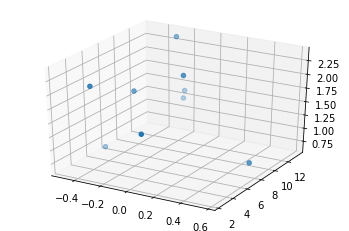

In [2]:
'''Plot'''
fig_3d = plt.figure()
fig_3d.add_subplot(1,1,1, projection='3d').scatter(x,y,z)
plt.show()

Observação: No jupyter-notebook dá para rotacionar mas aqui no google colab  o gráfico veio como uma figura estática.

**b) Algorítimo k-means 2d**

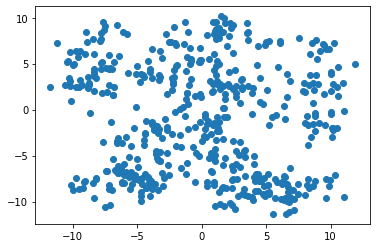

In [3]:
'''Pacotes'''
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

'''Dataset (dados aleatórios)'''
X, y = make_blobs(n_samples=500, centers= 50, random_state=0)

'''Plot dos dados originais'''
plt.scatter(X[:,0], X[:,1])
plt.show()

Utilizamos a curva curva wcss (Within-Cluster-Sum-of-Squares) para encontrar o número de clusters ideais, chegamos a conclusão de que 5 seria o número ótimo

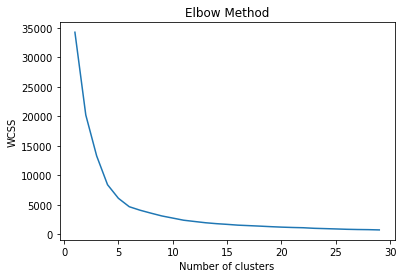

In [4]:
'''Número ideal de clusters - Curva wcss'''
wcss = []
for i in range(1,30):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

'''Plot da curva css'''
plt.plot(range(1,30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

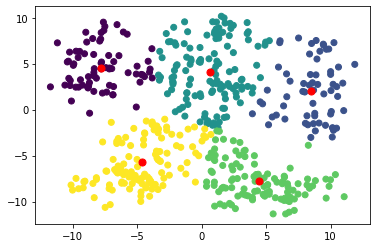

In [5]:
'''Plot dos clusters'''
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')
plt.show()

## **K-means 3D**

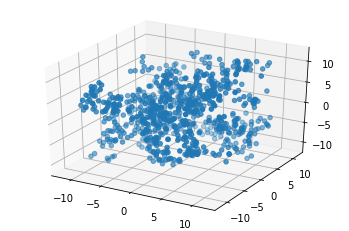

In [6]:
'''Dataset (dados aleatórios)'''
X, y = make_blobs(n_samples=800, centers= 100, random_state=0, n_features=3)
# Para mudar para dados 3d bastou adicionar o n_features = 3.
# Par melhorar a distribuição dos dados no espaço 3d aumentei o n_samples para 800 e o n_centers para 100.

'''Plot dos dados originais'''
fig_3d = plt.figure()
fig_3d.add_subplot(1,1,1, projection='3d').scatter(X[:,0], X[:,1], X[:,2])
plt.show()

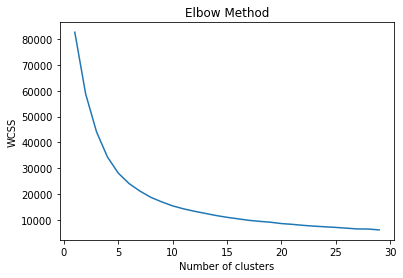

In [7]:
'''Número ideal de clusters - Curva wcss'''
wcss = []
for i in range(1,30):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
# 5 clusters continua sendo a divisão ideal para esse dataset
 
'''Plot da curva css'''
plt.plot(range(1,30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

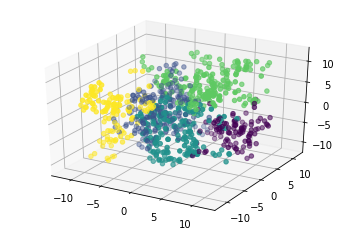

In [8]:
'''Plot dos clusters'''
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
fig_3d = plt.figure()
fig_3d.add_subplot(1,1,1, projection='3d').scatter(X[:,0], X[:,1], X[:,2], c=pred_y)
plt.show()

## **Evolução dos clusters**

O exercício era para ter acabado aqui mas fiquei curiosa em saber como é a evolução do cluster à cada iteração em uma amostra 3D. Sabendo que `n_init` é o número de vezes que um centroide é esolhido e `max_iter` é o número máximo de iterações que o k-means irá fazer, vou fazer uma escolha de centroide e X iterações e plotar em subplots utilizando um loop for:

In [0]:
'''Pacote para fazer o download de imagens do colab'''
from google.colab import files

'''Plot dos clusters'''
for i in range(1,11):
  kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=i, n_init=1, random_state=0)
  pred_y = kmeans.fit_predict(X)
  fig_3d = plt.figure()
  fig_3d.add_subplot(1,1,1, projection='3d').scatter(X[:,0], X[:,1], X[:,2], c=pred_y)
  plt.title('Iteration {}'.format(i))
  plt.savefig('kmeans{}.jpg'.format(i))
  files.download('kmeans{}.jpg'.format(i))
plt.close()

## **Visualização do resultado**

Para finalizar, fiz um pequeno vídeo com os plots gerados para as 10 iterações, dê uma conferida:

In [0]:
# É possível colocar o vídeo no jupyter notebook ou no google colab com qualquer uma dessas funções. Elas aparecem no arquivo editável do notebook e no html, porém, quando eu subo no github elas somem. Por esse motivo, vou fazer dessa outra maneira: https://groups.google.com/forum/#!topic/jupyter/O6mGAxuarbs
from IPython.display import YouTubeVideo # YouTubeVideo('1HhTusjL42k', width=560, height=315)
from IPython.display import HTML # HTML('<iframe> ... </iframe>')

[![Imgur](https://drive.google.com/uc?id=1xC3aCn_cW2AY4GZb_Y1Q5B08LCcuBPOB)](https://www.youtube.com/watch?v=1HhTusjL42k&feature=youtu.be "Project - k-means 3d")

## **Conclusão**

Ao final do experimento aprendi algumas coisas interessantes:

- Sim, é possível fazer a clusterização com dados 3D.
- A junção dos dois conceitos demandou apenas entender como é a notação dos arrays do numpy, os quais eu não era muito familiarizada.
- É possível programar o download de imagens com um pacote próprio do google colab (se eu não houvesse essa possibilidade, eu teria que clicar em imagem por imagem para fazer o download)
- É possível incluir vídeos no notebook através da função HTML ou YouTubeVideo do pacote IPython.display. Mas se for subir para o github o vídeo não aparece e pode-se usar a solução com Markdown proposta nesse link https://groups.google.com/forum/#!topic/jupyter/O6mGAxuarbs.

In [10]:
%%html

<iframe width="560" height="315" src="https://www.youtube.com/embed/1HhTusjL42k" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>